# Table of Contents

# 01. Importing Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 02. Importing Data

In [13]:
# Import Data
df = pd.read_csv(os.path.join('insurance_clean.csv'), index_col = False)

In [14]:
# View dataframe
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [16]:
# Check shape of dataframe
df.shape

(1337, 7)

# 03. Visual Exploration

C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


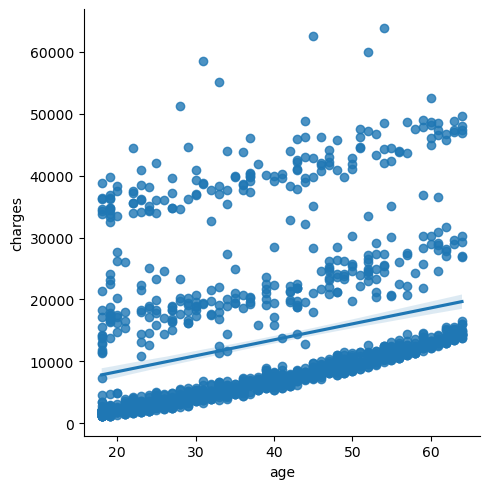

In [17]:
# Create scatterplot for 'charges' and 'age' columns
sns.lmplot(x = 'age', y = 'charges', data = df)

C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


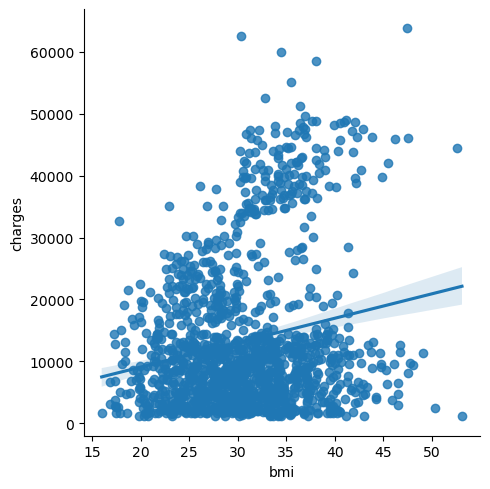

In [18]:
# Create scatterplot for 'charges' and 'age' columns
sns.lmplot(x = 'bmi', y = 'charges', data = df)

I am interested to see if whether a person is a smoker or not has an affect on charges with age also being considered.

In [23]:
# Create subsets of smokers and nonsmokers
smokers = df[df['smoker'] == 'yes']
non_smokers = df[df['smoker'] == 'no']

C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


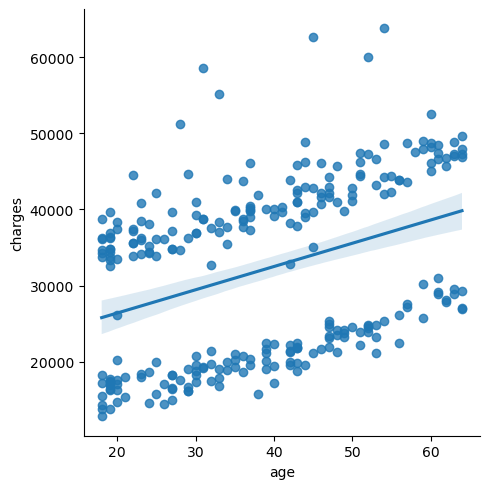

In [20]:
# Use smokers subset to create scatterplot comparing age and charges
sns.lmplot(x = 'age', y = 'charges', data = smokers)

C:\Users\erj03\OneDrive\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


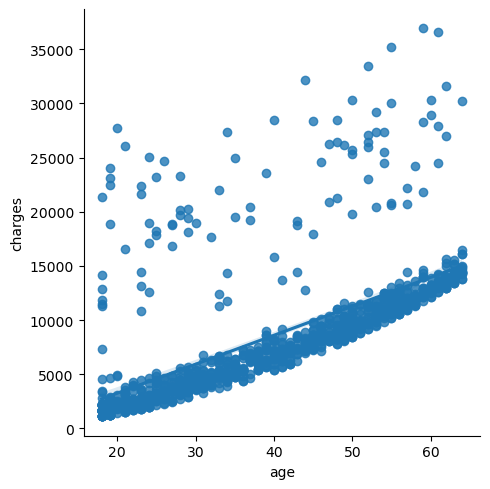

In [22]:
# Use nonsmokers subset to create scatterplot of age and charges
sns.lmplot(x = 'age', y = 'charges', data = non_smokers)

The scatterplots of the two subsets show that the large grouping with charges less than 15,000 USD comes from the non-smokers. 

## Hypothesis: If you are a smoker and older in age you will have higher medical costs.

# 04. Data Prep for Regression Analysis

In [42]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['age'].values.reshape(-1,1)
y = df['charges'].values.reshape(-1,1)

In [26]:
print(X)

[[19]
 [18]
 [28]
 ...
 [18]
 [21]
 [61]]


In [27]:
print(y)

[[16884.924 ]
 [ 1725.5523]
 [ 4449.462 ]
 ...
 [ 1629.8335]
 [ 2007.945 ]
 [29141.3603]]


In [28]:
# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 05. Regression Analysis

In [29]:
# Create a regression object
regression = LinearRegression()

In [30]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

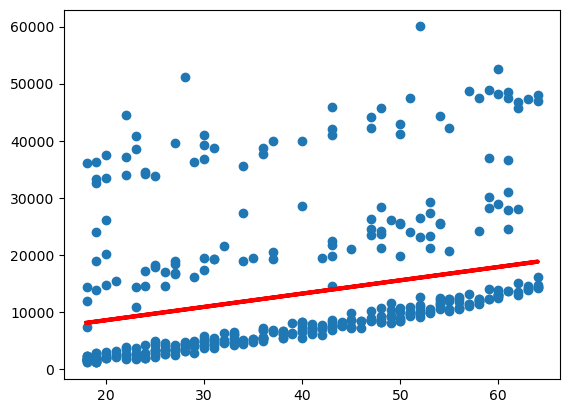

In [38]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.show()

The line only hits a few of the actual data points. However there does seem to be an equal amount of points above and below the line.

In [36]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [37]:
# Print model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[233.02389044]]
Mean squared error:  146173303.34737504
R2 score:  0.10739068301367438


In [39]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

In [41]:
# View dataframe
data.head()

Actual     Predicted
0   1633.9618   8086.242979
1   8547.6913  14843.935802
2   9290.1395  15309.983583
3  32548.3405   8319.266870
4   9644.2525  15776.031364

# 06. Interpretation

The mean squared error for the regression analysis is extremely high (1,461,73,303) meaning that this is definitely not a reliable model for this data set. The R2 scores is also very low (0.107) which is another indicator that the model is not working. This is probably due to the weak correlation seen between the two variables being analyzed. I hypothesized that if someone is a smoker or not would have an affect when comparing age vs charges so I am going to repeat this process with the smoker and nonsmoker subsets.

# 07. Smoker vs Nonsmoker Analysis

## Smokers

In [45]:
# Reshape the variables into NumPy arrays and put them into separate objects
X1 = smokers['age'].values.reshape(-1,1)
y1 = smokers['charges'].values.reshape(-1,1)

In [46]:
X1

array([[19],
       [62],
       [27],
       [30],
       [34],
       [31],
       [22],
       [28],
       [35],
       [60],
       [36],
       [48],
       [36],
       [58],
       [18],
       [53],
       [20],
       [28],
       [27],
       [22],
       [37],
       [45],
       [57],
       [59],
       [64],
       [56],
       [38],
       [61],
       [20],
       [63],
       [29],
       [44],
       [19],
       [32],
       [34],
       [30],
       [46],
       [42],
       [48],
       [18],
       [30],
       [42],
       [18],
       [63],
       [36],
       [27],
       [35],
       [19],
       [42],
       [40],
       [19],
       [23],
       [63],
       [18],
       [63],
       [54],
       [50],
       [56],
       [19],
       [20],
       [52],
       [19],
       [46],
       [40],
       [50],
       [40],
       [54],
       [59],
       [25],
       [19],
       [47],
       [31],
       [53],
       [43],
       [27],
       [34],
       [45],

In [47]:
y1

array([[16884.924  ],
       [27808.7251 ],
       [39611.7577 ],
       [36837.467  ],
       [37701.8768 ],
       [38711.     ],
       [35585.576  ],
       [51194.55914],
       [39774.2763 ],
       [48173.361  ],
       [38709.176  ],
       [23568.272  ],
       [37742.5757 ],
       [47496.49445],
       [34303.1672 ],
       [23244.7902 ],
       [14711.7438 ],
       [17663.1442 ],
       [16577.7795 ],
       [37165.1638 ],
       [39836.519  ],
       [21098.55405],
       [43578.9394 ],
       [30184.9367 ],
       [47291.055  ],
       [22412.6485 ],
       [15820.699  ],
       [30942.1918 ],
       [17560.37975],
       [47055.5321 ],
       [19107.7796 ],
       [39556.4945 ],
       [17081.08   ],
       [32734.1863 ],
       [18972.495  ],
       [20745.9891 ],
       [40720.55105],
       [19964.7463 ],
       [21223.6758 ],
       [15518.18025],
       [36950.2567 ],
       [21348.706  ],
       [36149.4835 ],
       [48824.45   ],
       [43753.33705],
       [37

In [43]:
# Create a regression object
regression1 = LinearRegression()

In [48]:
# Split data into training set and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [49]:
# Fit the regression object onto the training set
regression1.fit(X1_train, y1_train)

LinearRegression()

In [50]:
# Predict the values of y1 using X1
y1_predicted = regression1.predict(X1_test)

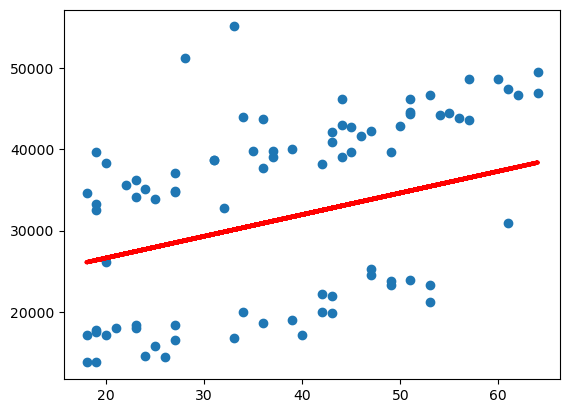

In [51]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X1_test, y1_test)
plot_test.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test.show()

In [53]:
# Create objects that contain the model summary statistics
rmse1 = mean_squared_error(y1_test, y1_predicted)
r2_1 = r2_score(y1_test, y1_predicted)

In [54]:
# Print model summary statistics
print('Slope:' ,regression1.coef_)
print('Mean squared error: ', rmse1)
print('R2 score: ', r2_1)

Slope: [[266.83653435]]
Mean squared error:  108716595.62821752
R2 score:  0.18234672169945199


In [55]:
# Create a dataframe comparing the actual and predicted values of y
data1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})

In [56]:
print(data1)

         Actual     Predicted
0   44641.19740  34901.423862
1   38344.56600  26629.491298
2   44423.80300  35968.770000
3   23807.24060  34367.750794
4   48673.55880  37302.952671
..          ...           ...
78  39725.51805  33300.404656
79  46718.16325  37836.625740
80  14571.89080  27696.837435
81  32734.18630  29831.529710
82  41661.60200  33567.241191

[83 rows x 2 columns]


Again we see that the line does not actually hit many of the data points. The mean squared error is 108,716,596. This is still an extremely high MSE value but significantly lower than when looking at all indiviuals rather than the subset. The R2 value is 0.18 which is still low but again higher than when looking at the entire dataframe. This model is still not reliable for the dataset but is working slightly better for the subset compared to the entire thing. 

## Nonsmokers

In [57]:
# Reshape the variables into NumPy arrays and put them into separate objects
X2 = non_smokers['age'].values.reshape(-1,1)
y2 = non_smokers['charges'].values.reshape(-1,1)

In [58]:
X2

array([[18],
       [28],
       [33],
       ...,
       [18],
       [18],
       [21]], dtype=int64)

In [59]:
y2

array([[ 1725.5523 ],
       [ 4449.462  ],
       [21984.47061],
       ...,
       [ 2205.9808 ],
       [ 1629.8335 ],
       [ 2007.945  ]])

In [60]:
# Create a regression object
regression2 = LinearRegression()

In [61]:
# Split data into training set and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [62]:
# Fit the regression object onto the training set
regression2.fit(X2_train, y2_train)

LinearRegression()

In [63]:
# Predict the values of y2 using X2
y2_predicted = regression2.predict(X2_test)

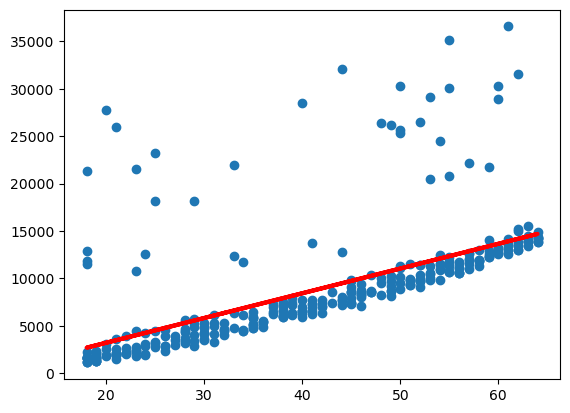

In [64]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X2_test, y2_test)
plot_test.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test.show()

In [65]:
# Create objects that contain the model summary statistics
rmse2 = mean_squared_error(y2_test, y2_predicted)
r2_2 = r2_score(y2_test, y2_predicted)

In [66]:
# Print model summary statistics
print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r2_2)

Slope: [[260.90300784]]
Mean squared error:  28538020.87170676
R2 score:  0.349215607773267


In [67]:
# Create a dataframe comparing the actual and predicted values of y
data2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})

In [68]:
print(data2)

          Actual     Predicted
0     5253.52400   6352.143343
1    11345.51900  13135.621547
2    18218.16139   4525.822288
3    10579.71100  11831.106507
4     1909.52745   3482.210256
..           ...           ...
314   6238.29800   8178.464398
315   6389.37785   8439.367405
316   6610.10970   8439.367405
317  15019.76005  14179.233578
318   3994.17780   6352.143343

[319 rows x 2 columns]


The line on this regression model touches many more of the actual data points than either of the two above. The mean squared value is 28,538,020. This is still very high and indicates that the model isn't reliable but is significantly lower than either the full dataset or the subset of smokers. THe R2 value is 0.40. Again, this indicates the model isn't reliable but is still a much better outcome than seen above. 

## Interpretation

Non-smokers follow a pattern much more significantly than smokers. One way to interpret this could be that individuals who smoke have much more variability in their health overall. Smoking leads to many health issues on its own, and we don't know what else could be associated with this. For example, it could be that people who smoke make poor decisions about their overall health in say they're eating/drinking habits. This is something that can't be determined from this dataset. Perhaps comparing the two subsets of smokers and nonsmokers with another variable such as bmi will be the next step for this analysis. 